In [1]:
import torch

In [2]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [3]:
i = torch.ones(5, 3, dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [4]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3)

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [5]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

r1 = torch.rand(2, 2)
r2 = torch.rand(3, 2)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [6]:
r = (torch.rand(2, 2) - 0.5) * 2
print('A random matrix, r:')
print(r)

print('\nAbsolute value of r:')
print(torch.abs(r))

print('\nInverse sine of r:')
print(torch.asin(r))

print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[-0.9093,  0.0070],
        [ 0.9956, -0.2232]])

Absolute value of r:
tensor([[0.9093, 0.0070],
        [0.9956, 0.2232]])

Inverse sine of r:
tensor([[-1.1417,  0.0070],
        [ 1.4775, -0.2251]])

Determinant of r:
tensor(0.1960)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.6644,  0.7474],
        [ 0.7474,  0.6644]]),
S=tensor([1.3591, 0.1442]),
V=tensor([[ 0.9920, -0.1262],
        [-0.1262, -0.9920]]))

Average and standard deviation of r:
(tensor(0.7882), tensor(-0.0325))

Maximum value of r:
tensor(0.9956)


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class LeNet(nn.Module):
    def __init__(self) -> None:
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [9]:
net = LeNet()
print(net)

input = torch.rand(1, 1, 32, 32)
print('\nImage batch shape:')
print(input.shape)

output = net(input)
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[ 0.0975,  0.0098,  0.1145,  0.0118,  0.0843, -0.0274,  0.0607, -0.0308,
          0.0366,  0.0646]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [10]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose (
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

In [11]:
trainset = torchvision.datasets.CIFAR10(root='/data/yinxiaoln/datasets',
                                        train=True,
                                        download=True,
                                        transform=transform)

Files already downloaded and verified


In [12]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 ship   dog  deer   cat


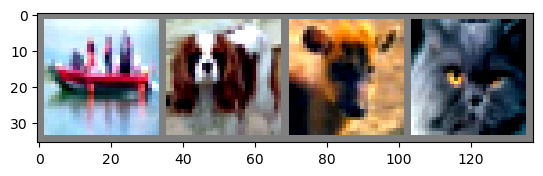

In [13]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import torch.utils


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='/data/yinxiaoln/datasets', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='/data/yinxiaoln/datasets', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 frog horse horse truck


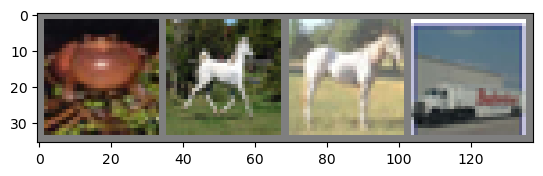

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [19]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.207
[1,  4000] loss: 1.901
[1,  6000] loss: 1.701
[1,  8000] loss: 1.589
[1, 10000] loss: 1.521
[1, 12000] loss: 1.487
[2,  2000] loss: 1.395
[2,  4000] loss: 1.374
[2,  6000] loss: 1.344
[2,  8000] loss: 1.335
[2, 10000] loss: 1.306
[2, 12000] loss: 1.288
Finished Training


In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %
